In [7]:
# Import essential libraries for data processing and model building
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For data preprocessing
import tensorflow as tf  # For deep learning model building
from tensorflow.keras.models import Sequential  # To define the sequential model
from tensorflow.keras.layers import LSTM, Dense, Dropout  # LSTM and Dense layers for the model

In [9]:
# Load the dataset
file_path = 'C:\\Users\\Nirusan03\\PycharmProjects\\FYP_POC\\Final_Dataset.csv'  # Replace with your actual dataset file path
dataset = pd.read_csv(file_path)

# Separate features and labels
# 'features' contains all the network traffic data except the labels
features = dataset.drop(columns=['Label', 'Label.1'])  # Drop target label columns from features
# 'labels' is the target column representing malicious or benign traffic
labels = dataset['Label']  # Using the primary 'Label' column as the target

# Normalize numerical features for faster and stable model training
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Encode the categorical labels into numeric format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    features_scaled, labels_encoded, test_size=0.3, random_state=42, stratify=labels_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Reshape the data for LSTM input (samples, timesteps, features)
# LSTM expects 3D input: [samples, timesteps, features]. Here, we assume 1 timestep.
X_train_lstm = np.expand_dims(X_train, axis=1)
X_val_lstm = np.expand_dims(X_val, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Display the shapes of the datasets for confirmation
print("Training set shape:", X_train_lstm.shape, y_train.shape)
print("Validation set shape:", X_val_lstm.shape, y_val.shape)
print("Test set shape:", X_test_lstm.shape, y_test.shape)


Training set shape: (7399, 1, 56) (7399,)
Validation set shape: (1585, 1, 56) (1585,)
Test set shape: (1586, 1, 56) (1586,)


In [10]:
# Define the LSTM model
model = Sequential([
    # LSTM layer with 64 units and 'tanh' activation function
    # Input shape: 1 timestep and number of features
    LSTM(64, input_shape=(1, X_train_lstm.shape[2]), activation='tanh', return_sequences=False),
    
    # Dropout layer to prevent overfitting
    Dropout(0.3),
    
    # Fully connected Dense layer with 32 units and 'relu' activation
    Dense(32, activation='relu'),
    
    # Dropout layer for additional regularization
    Dropout(0.2),
    
    # Output layer with softmax activation for multi-class classification
    Dense(len(np.unique(y_train)), activation='softmax')  # Output dimension matches the number of classes
])

# Compile the model
# Loss: Sparse categorical crossentropy (for multi-class classification)
# Optimizer: Adam (adaptive learning rate)
# Metrics: Accuracy (to monitor during training)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


c:\Users\Nirusan03\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        30,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,188 (129.64 KB)

 Trainable params: 33,188 (129.64 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the LSTM model
# Validation data is used to monitor performance during training
history = model.fit(
    X_train_lstm, y_train,          # Training data
    validation_data=(X_val_lstm, y_val),  # Validation data
    epochs=20,                      # Number of epochs to train
    batch_size=32                   # Batch size for training
)

Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4830 - loss: 1.1670 - val_accuracy: 0.7350 - val_loss: 0.6380
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7157 - loss: 0.6590 - val_accuracy: 0.7476 - val_loss: 0.5526
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7421 - loss: 0.5725 - val_accuracy: 0.7495 - val_loss: 0.5164
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.5483 - val_accuracy: 0.7653 - val_loss: 0.4984
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7673 - loss: 0.5148 - val_accuracy: 0.7729 - val_loss: 0.4737
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7654 - loss: 0.4952 - val_accuracy: 0.7697 - val_loss: 0.4697
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7734 - loss: 0.4924 - val_accuracy: 0.7754 - val_loss: 0.4629
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7864 - loss: 0.4735 - val_accuracy: 0.

Test Accuracy: 0.82


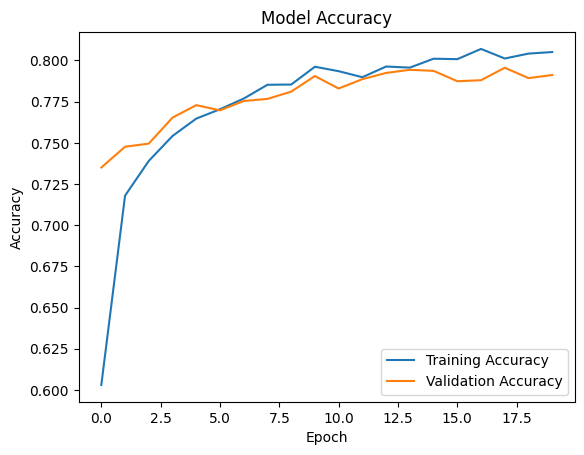

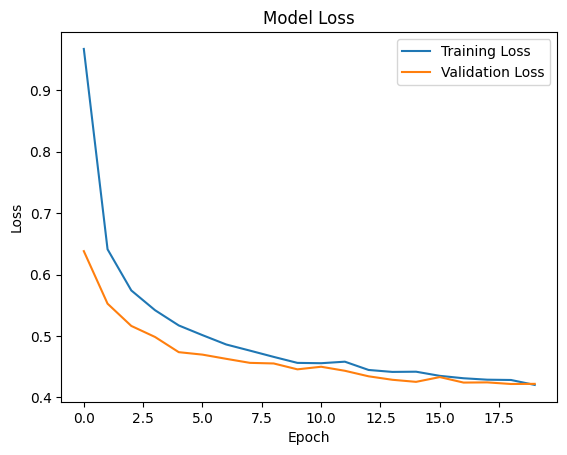

In [12]:
# Evaluate the model on the test set
# Calculates loss and accuracy on unseen test data
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Save the trained LSTM model to a file
model.save('lstm_model_tls_detection.h5')
print("Model saved successfully.")

Model saved successfully.
